In [10]:
# Load libraries
import pandas
import numpy as np
import statsmodels.api as sm
from patsy import dmatrices
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [12]:
# Load dataset
dataset = pandas.read_csv('C:/Users/Thoma/OneDrive/Desktop/PredictorFour/FinalData.csv')

In [13]:
#These values do not affect what we are predicting (not even referee in my opinion) so we will delete them
del dataset['ID']
del dataset['Date']
del dataset['Referee']

In [14]:
#These are neither getting predicted or providing prior knowledge
del dataset['HTHG']
del dataset['HTAG']
del dataset['HTR-A']
del dataset['HTR-D']
del dataset['HTR-H']

In [15]:
#normalisation. Dividing wins by number of games played to make it even for all teams. Can't do 0 divided by 0 so keep the same if less than 1
dataset['HHWins'] = np.where(dataset['HHGames'] < 1, dataset['HHWins'], dataset['HHWins']/dataset['HHGames'])
dataset['AHWins'] = np.where(dataset['AHGames'] < 1, dataset['AHWins'], dataset['AHWins']/dataset['AHGames'])
dataset['HAWins'] = np.where(dataset['HAGames'] < 1, dataset['HAWins'], dataset['HAWins']/dataset['HAGames'])
dataset['AAWins'] = np.where(dataset['AAGames'] < 1, dataset['AAWins'], dataset['AAWins']/dataset['AAGames'])

In [16]:
#Encode the strings as numericals in order for the algorithms to be able to take them
#0-Away win, 1- Draw, 2- Home Win
from sklearn.preprocessing import LabelEncoder
lbl_enc = LabelEncoder()
lbl_enc.fit(dataset.FTR)
dataset.FTR = lbl_enc.transform(dataset.FTR)
lbl_enc.fit(dataset.HomeTeam)
dataset.HomeTeam = lbl_enc.transform(dataset.HomeTeam)
lbl_enc.fit(dataset.AwayTeam)
dataset.AwayTeam = lbl_enc.transform(dataset.AwayTeam)

In [17]:
dataset.groupby('FTR').mean()

,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HST,AST,HF,AF,...,HHCorners,HAShots,HAShotsTarget,HACorners,AHShots,AHShotsTarget,AHCorners,AAShots,AAShotsTarget,AACorners
FTR,,,,,,,,,,,,,,,,,,,,,
0,10.927944,8.571178,0.602812,2.233743,12.430580,12.776801,4.797891,6.126538,11.404218,11.611599,...,5.069872,9.603560,4.189039,4.165731,9.853875,4.291985,4.242475,10.770752,4.858503,4.576006
1,9.856863,9.850980,1.001961,1.001961,13.556863,11.074510,5.845098,4.831373,11.354902,12.000000,...,5.336828,10.425229,4.679287,4.365888,10.555834,4.775979,4.483465,10.096011,4.594728,4.282331
2,9.030837,10.522026,2.346916,0.484581,14.929515,9.914097,7.429515,4.213656,10.986784,11.856828,...,5.684207,11.149861,5.150235,4.730764,10.955354,5.022493,4.648573,9.707656,4.356117,4.128744


Text(0, 0.5, 'Frequency')

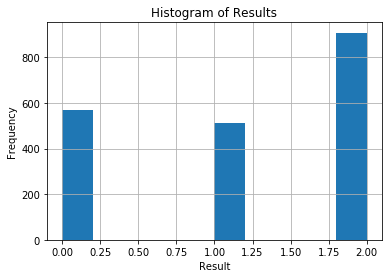

In [18]:
# show plots in the notebook
%matplotlib inline

# histogram of results
dataset["FTR"].hist()
plt.title('Histogram of Results')
plt.xlabel('Result')
plt.ylabel('Frequency')


In [19]:
# Get all the columns from the dataframe.
columns = dataset.columns.tolist()
# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["Season","FTHG", "FTAG", "FTR", "HS", "AS", "HST", "HST", "AST", "HF", "AF", "HC", 
"AC", "HY", "AY", "HR", "AR", "AS"]]

# Store the variable we'll be predicting on.
target = "FTR"


In [20]:
# Generate the training set.  Set random_state to be able to replicate results. 0.7 to not overfit data.
train = dataset.sample(frac=0.7, random_state=1)
# Select anything not in the training set and put it in the testing set.
test = dataset.loc[~dataset.index.isin(train.index)]
# Print the shapes of both sets.
print(train.shape)
print(test.shape)

(1391, 38)
(596, 38)


In [21]:
# Initialize the model class.
model = LogisticRegression()
# Fit the model to the training data.
model.fit(train[columns], train[target])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
#accuracy
model.score(train[columns], train[target])

0.5262401150251618

In [23]:
# Import the scikit-learn function to compute error.
from sklearn.metrics import mean_squared_error
# Generate our predictions for the test set.
predictions = model.predict(test[columns])

# Compute error between our test predictions and the actual values.
mean_squared_error(predictions, test[target])

1.233221476510067

In [24]:
#mean
train[target].mean()

1.1718188353702372

In [25]:
print(predictions)


[0 2 0 0 2 2 2 2 2 2 0 0 2 2 0 2 2 2 2 2 2 2 1 0 2 0 2 2 2 0 2 0 2 2 2 2 2
 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 0 2 2 0 2 2 2 2 2 0 0 2 0 0 0 0 2 2 0
 0 2 2 2 2 2 0 0 2 2 2 0 2 2 0 2 2 2 2 0 0 0 2 2 2 2 2 2 0 0 0 2 2 0 0 0 2
 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2 0 2 0 0 2 0 0 2 2 2 2 2 2 0 2 2 2 2 2 0
 2 0 2 2 2 0 2 2 2 2 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0
 2 0 0 2 0 2 2 2 2 2 0 2 2 0 0 2 2 2 2 2 2 0 2 0 2 2 0 0 0 2 2 2 2 2 0 2 2
 2 0 2 2 0 0 0 2 2 2 2 2 2 0 2 0 2 0 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 2 0 2 0 1 2 0 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 0 2 2 2 2 0 2 0 2 2 0 2 2
 2 0 2 0 1 2 2 2 2 2 0 2 0 2 2 0 2 2 2 0 0 2 2 0 2 2 2 2 0 2 0 2 2 2 2 0 2
 2 2 0 2 0 2 2 0 0 0 2 2 0 2 0 2 2 0 0 2 2 2 0 0 2 0 0 2 2 2 2 2 2 0 0 0 2
 0 0 2 2 2 2 0 0 2 2 2 0 0 2 2 2 0 0 0 2 2 2 2 2 2 0 2 0 2 0 0 0 0 2 2 0 2
 2 2 2 0 0 2 2 2 2 2 0 2 2 0 2 0 0 2 2 2 2 2 2 0 0 0 0 2 2 2 0 2 2 1 2 2 0
 2 0 0 2 2 0 2 0 2 0 0 2 

In [26]:
# generate class probabilities
probs = model.predict_proba(test[columns])
print (probs)

[[0.52778334 0.23707172 0.23514494]
 [0.15807671 0.25797772 0.58394557]
 [0.44831888 0.30265608 0.24902505]
 ...
 [0.08391627 0.18279935 0.73328438]
 [0.36456658 0.23456329 0.40087013]
 [0.21032792 0.26331487 0.52635721]]


In [27]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), train[columns], train[target], scoring='accuracy', cv=10)
print (scores)
print (scores.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

[0.51428571 0.54285714 0.55       0.46428571 0.43884892 0.53956835
 0.53956835 0.51798561 0.50724638 0.45255474]
0.5067200915787295


In [28]:
# Load test dataset
testset = pandas.read_csv('C:/Users/Thoma/OneDrive/Desktop/PredictorFour/TestEPLData.csv')

In [29]:
#Do all the same transformation
del testset['ID']
del testset['Date']
del testset['Referee']
del testset['HTHG']
del testset['HTAG']
del testset['HTR-A']
del testset['HTR-D']
del testset['HTR-H']
del testset['FTHG']
del testset['FTAG']
del testset['HS']
del testset['AS']
del testset['HST']
del testset['AST']
del testset['HF']
del testset['AF']
del testset['HC']
del testset['AC']
del testset['HY']
del testset['AY']
del testset['HR']
del testset['AR']

from sklearn.preprocessing import LabelEncoder
testset['HHWins'] = np.where(testset['HHGames'] < 1, testset['HHWins'], testset['HHWins']/testset['HHGames'])
testset['AHWins'] = np.where(testset['AHGames'] < 1, testset['AHWins'], testset['AHWins']/testset['AHGames'])
testset['HAWins'] = np.where(testset['HAGames'] < 1, testset['HAWins'], testset['HAWins']/testset['HAGames'])
testset['AAWins'] = np.where(testset['AAGames'] < 1, testset['AAWins'], testset['AAWins']/testset['AAGames'])
lbl_enc = LabelEncoder()
lbl_enc.fit(testset.FTR)
testset.FTR = lbl_enc.transform(testset.FTR)
lbl_enc.fit(testset.HomeTeam)

LabelEncoder()

In [30]:
testset


,HomeTeam,AwayTeam,FTR,Season,HHGames,HAGames,AAGames,AHGames,HHWins,AHWins,...,HHCorners,HAShots,HAShotsTarget,HACorners,AHShots,AHShotsTarget,AHCorners,AAShots,AAShotsTarget,AACorners
0,8,15,0,2016-2017,2,5,4,4,1.00,0.50,...,10.126185,17.283367,5.469031,8.212262,9.115458,3.210376,3.081837,12.192212,5.394159,4.929675
1,1,17,0,2016-2017,4,4,4,4,0.75,0.50,...,5.566333,9.691024,2.447625,4.970323,14.242259,5.998860,3.610158,6.690125,2.872768,5.313723
2,4,5,0,2016-2017,4,4,4,4,0.25,0.25,...,7.501354,11.991029,2.612860,7.385992,13.624285,4.635256,8.654320,8.048362,3.461584,2.060494
3,11,19,0,2016-2017,4,4,4,4,0.00,0.00,...,4.446224,8.282644,2.349026,4.103347,17.548431,2.096058,4.031079,12.970043,3.799455,5.209236
4,13,10,0,2016-2017,4,4,3,4,0.25,0.00,...,6.641144,8.345680,4.462204,2.934759,20.026353,7.432527,9.990788,17.261448,4.149488,6.069197
5,18,14,0,2016-2017,4,4,4,4,0.25,0.25,...,4.692164,14.533070,5.222151,5.276757,9.375095,2.658002,5.558000,8.915716,1.515408,3.826328
6,9,16,0,2016-2017,4,4,4,4,0.75,1.00,...,10.120587,13.838605,5.655460,4.241193,16.563944,6.733074,6.483788,19.096320,7.065241,8.135566
7,0,2,0,2016-2017,4,4,3,5,0.75,0.40,...,5.823245,17.437872,4.674764,5.223290,10.113379,1.829122,3.414344,6.203114,1.057577,3.536195
8,3,6,0,2016-2017,4,4,4,4,0.75,0.50,...,7.685137,19.625089,7.003345,6.294061,8.282382,2.902540,3.946533,9.554056,3.349026,4.221793
9,12,7,0,2016-2017,4,4,4,4,0.50,0.25,...,7.216262,12.414855,5.271132,4.012176,10.293520,2.532171,3.718757,8.158832,1.441738,5.231624


In [31]:
testset.columns


Index(['HomeTeam', 'AwayTeam', 'FTR', 'Season', 'HHGames', 'HAGames',
       'AAGames', 'AHGames', 'HHWins', 'AHWins', 'AAWins', 'HAWins', 'HHShots',
       'HHShotsTarget', 'HHCorners', 'HAShots', 'HAShotsTarget', 'HACorners',
       'AHShots', 'AHShotsTarget', 'AHCorners', 'AAShots', 'AAShotsTarget',
       'AACorners'],
      dtype='object')

In [32]:
# Get all the columns from the dataframe.
columns2 = testset.columns.tolist()
# Filter the columns to remove ones we don't want.
columns2 = [c for c in columns if c not in ["Season"]]

# Store the variable we'll be predicting on.
target2 = "FTR"

In [33]:
# Generate our predictions for the test set.
predictions2 = model.predict(testset[columns2])

In [34]:
predictions2

array([2, 2, 2, 0, 0, 2, 2, 2, 2, 2])